## Project Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 


Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data description
1. We got 12 columns and 891 rows.
2. We have mixed type of data, and we can already see that we have null values. 
3. We will be able to drop couple of columns that have no relevance to our target variable as 'PassagerId', 'Ticket', 'Name' and maybe 'Cabin'. We have to see in this case how many NaN values we have. 
4. We will have to see the correlation between our target variable and features. 
5. We have to encode some of our data from 'Sex' and 'Embarked' column. 
6. We have a binary target data in 'Survived column. 
7. We can already see that the passagers from first class in 'Pclass' column are more likely to survive than others as well as females. 
8. We can check if having a sibling or a spouse in 'SibSp' column have any contribution to survival rate. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We got missing values in 'Age', 'Cabin' and 'Embarked' columns. The difference for 'Cabin is to big so I opt for droping the column along with the others I mentioned above. 

In [4]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

Now we have a cleared data. With only 8 columns out of which 1 is our target. I have to check that null values and replace them.
Also we can see the datatype as we have int, float and object. 

In [7]:
# checking the null values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

We have 177 null values in 'Age' column and 2 in 'Embarked'. 

<Axes: >

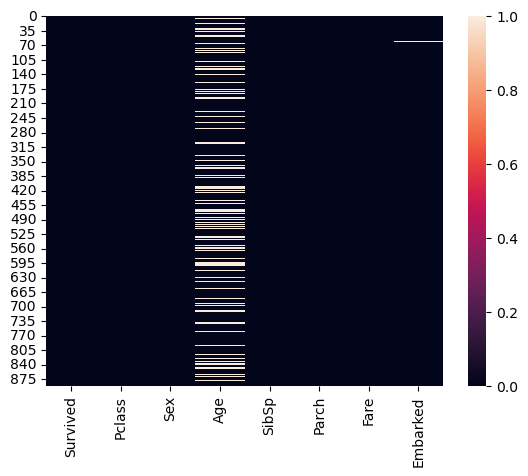

In [8]:
# we can see that is nonull using heatmap
sns.heatmap(df.isnull())

In [9]:
df["Age"] = df["Age"].fillna(df.Age.median()) 
df["Embarked"] = df["Embarked"].fillna(statistics.mode(df.Embarked))

In [10]:
# checking the null values again
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Now that we cleared our data we can play a bit with graphs to see some correlation between the target and some features. 

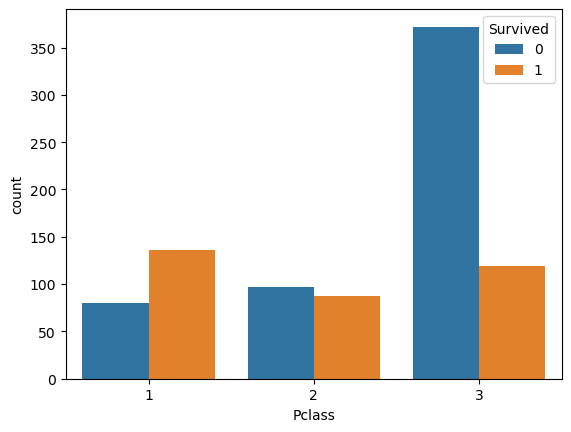

In [11]:
ax = sns.countplot(x="Pclass", hue="Survived", data=df)

We can see the difference for the third class and that the first class more survived than died. 

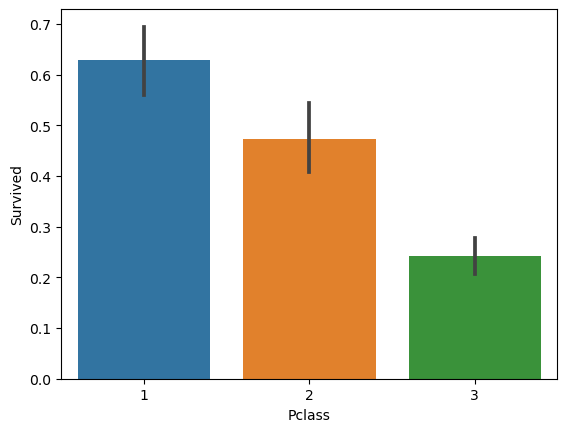

In [12]:
ax = sns.barplot(x = "Pclass", y = "Survived", data=df)

More than 60% of first class passengers survived. So we have a strong correlation between this feature and our target variable. 

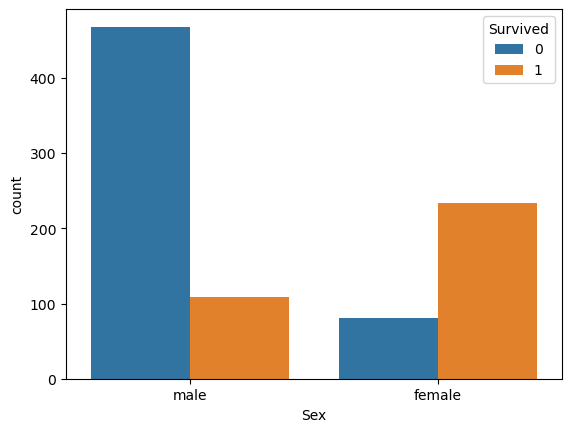

In [13]:
ax = sns.countplot(x="Sex", hue="Survived", data=df)

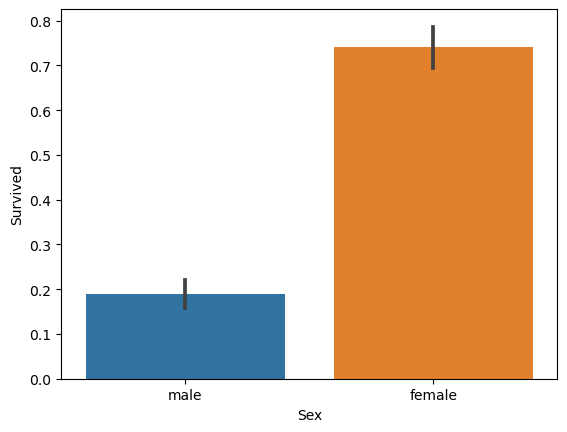

In [14]:
ax = sns.barplot(x = "Sex", y = "Survived", data=df)


More than 70% of female on Titanic survived. 

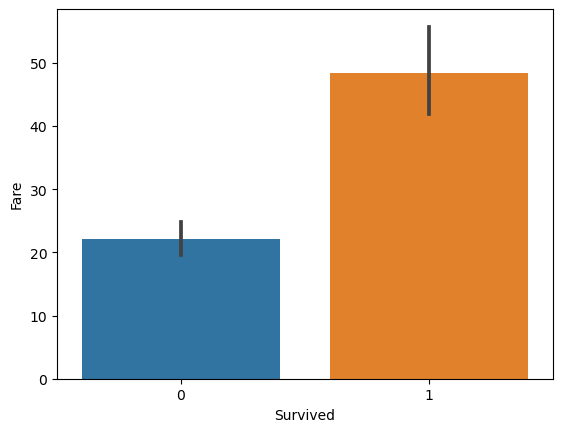

In [15]:
ax = sns.barplot(x = "Survived", y = "Fare", data=df)


A higher fare assure more chances of survive which make sense if we remember from the graph above that first class have a huge chance of survive than the other two. 

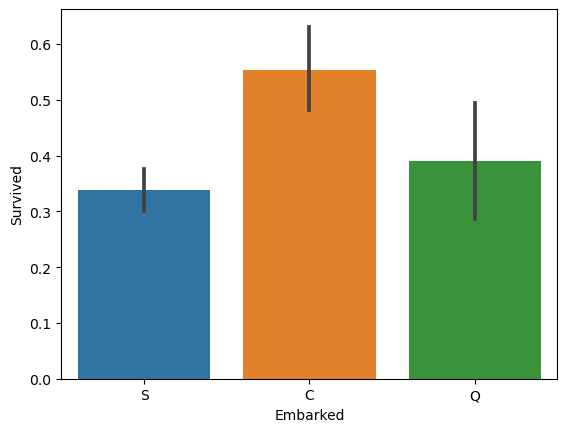

In [16]:
ax = sns.barplot(x = "Embarked", y = "Survived", data=df)


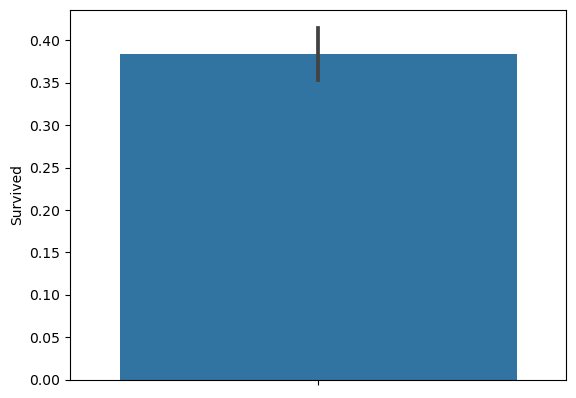

In [17]:
x = sns.barplot(y = "Survived", data=df)

Almost 40% of the people from our data survived. 

In [18]:
# encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,2.0
1,1,1,0.0,38.0,1,0,71.2833,0.0
2,1,3,0.0,26.0,0,0,7.9250,2.0
3,1,1,0.0,35.0,1,0,53.1000,2.0
4,0,3,1.0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.0,0,0,13.0000,2.0
887,1,1,0.0,19.0,0,0,30.0000,2.0
888,0,3,0.0,28.0,1,2,23.4500,2.0
889,1,1,1.0,26.0,0,0,30.0000,0.0


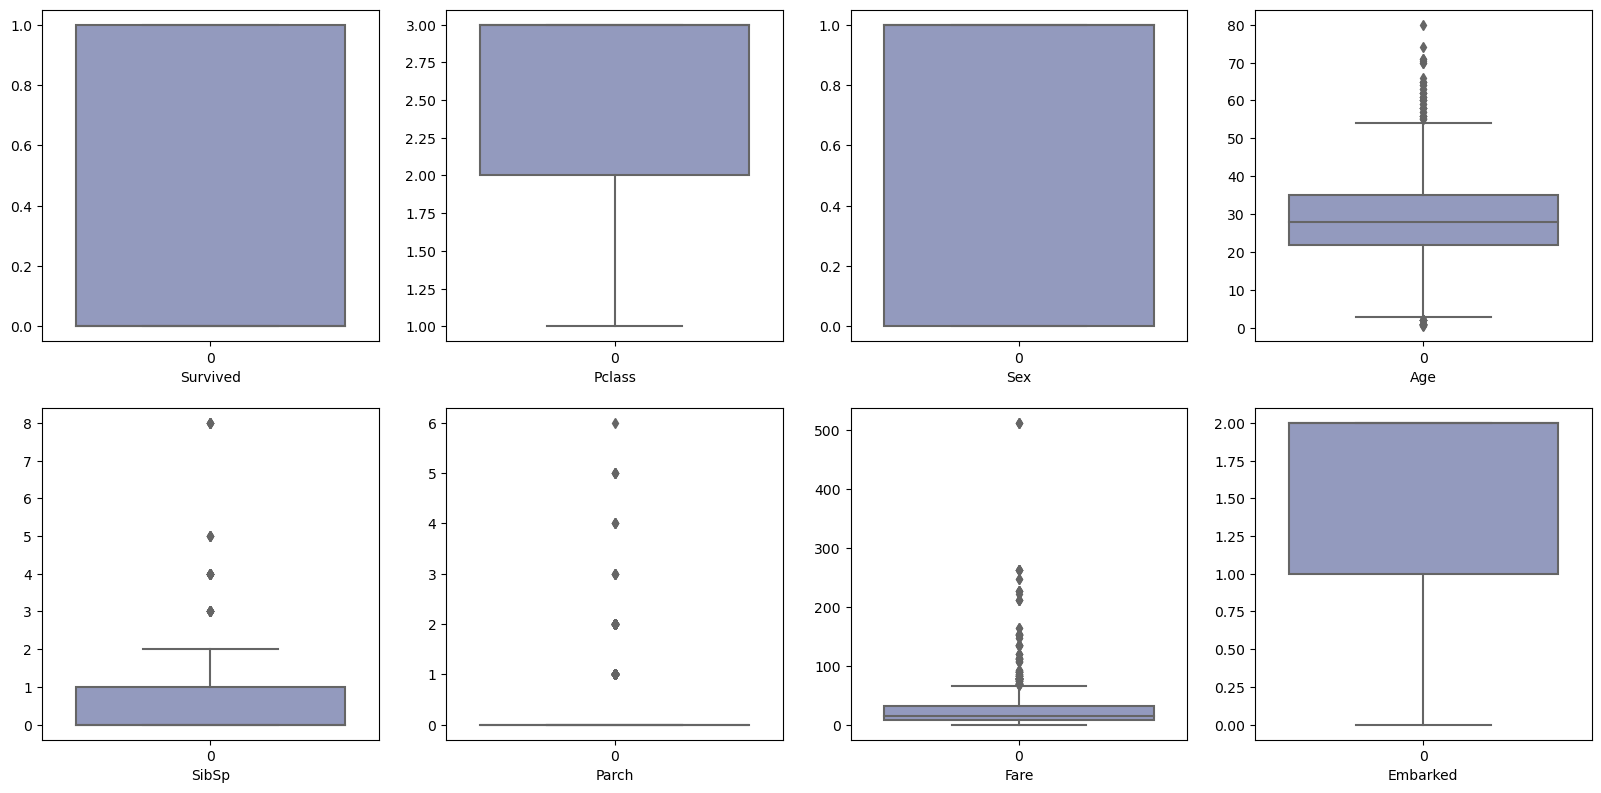

In [19]:
# lets check the outliers by plotting boxplot

plt.figure(figsize = (20, 25))
p = 1
for i in df: 
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette = 'BuPu')
        plt.xlabel(i)
    p +=1
plt.show()

We can see that we have outliers in 'Age, SubSP, Parch and Fare' columns but since our analysis is not based on age I don't see as an anomaly to have people that have ages above or under the mean. Also for people having kids or relatives on board or that pays bigger fares for better appartments on the ship. I will go further like this to see how my model is working and see after. 

In [20]:
# I check one more time the data using the describe method

df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


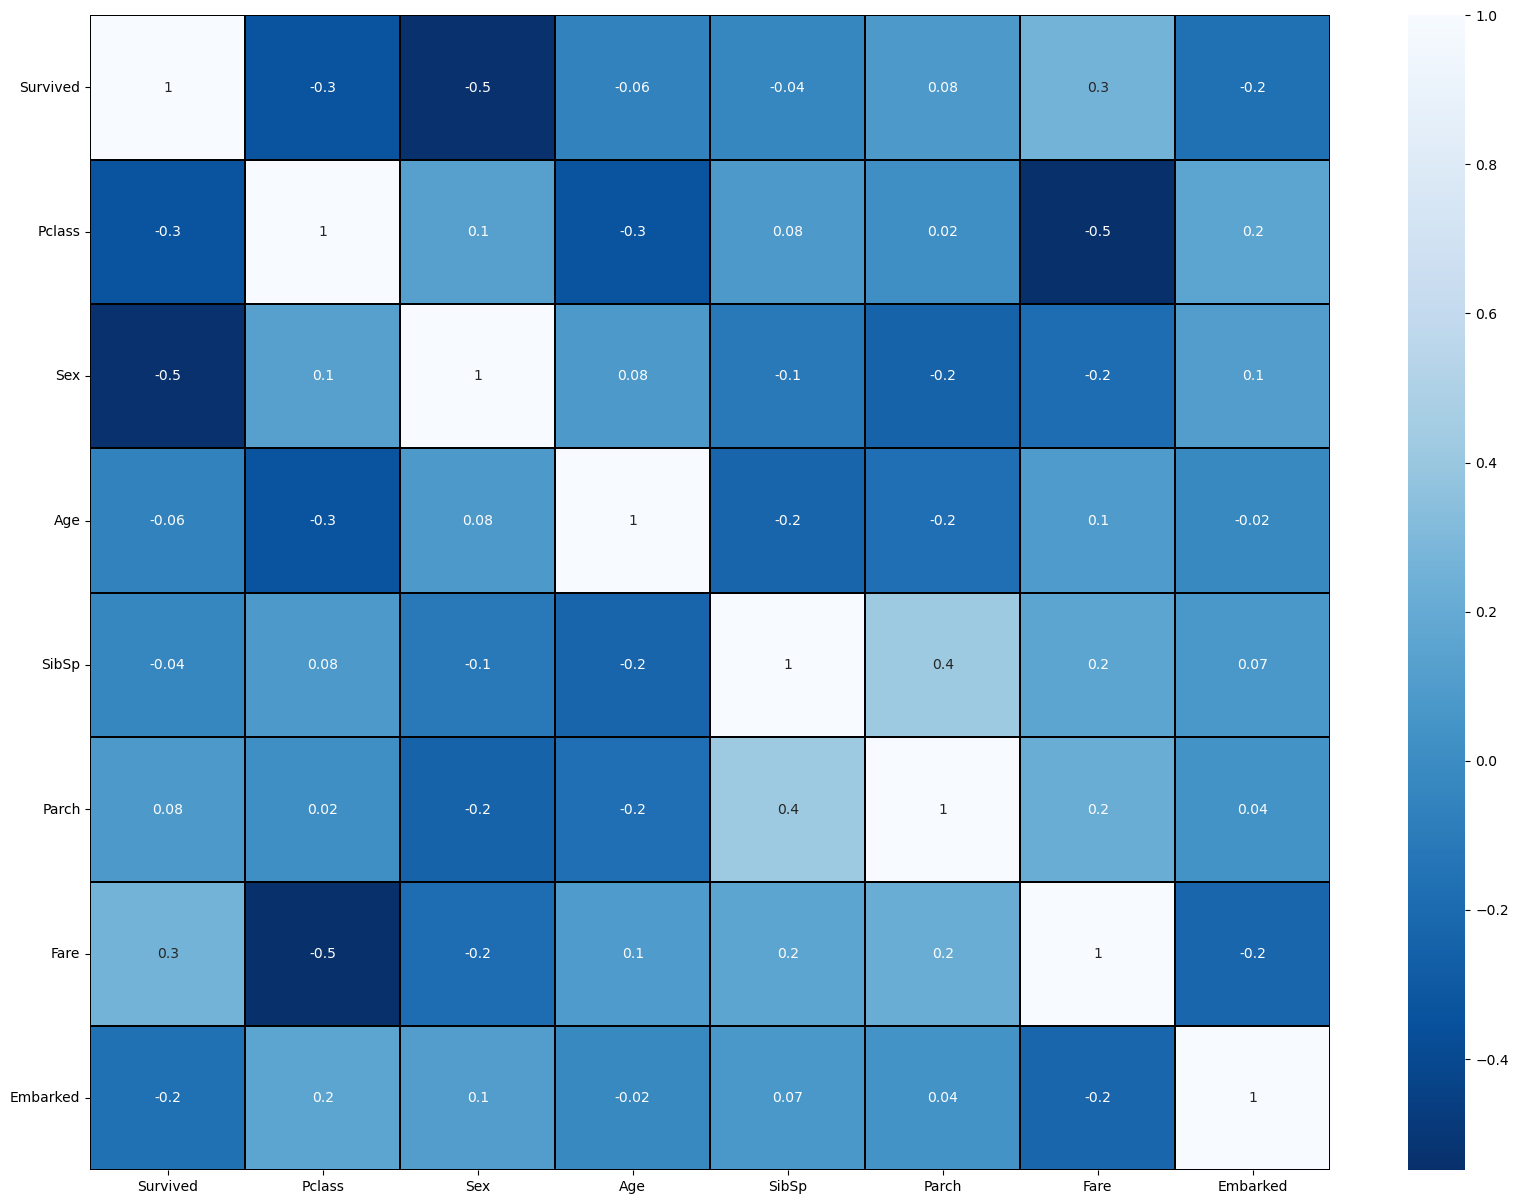

In [21]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'black', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

In [22]:
#importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

In [23]:
x = df.drop('Survived', axis = 1)
y = df['Survived']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)


In [26]:
LR = LogisticRegression()
KNN = KNeighborsClassifier(n_neighbors=2)
SVM = SVC(kernel='linear',C=1)
ADA = AdaBoostClassifier()
RFC = RandomForestClassifier(n_estimators= 10, max_depth=115, bootstrap= False)

In [27]:
for model in [LR, KNN, SVM, ADA, RFC]:
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    pred_train_df = accuracy_score(y_train, y_pred_train)
    pred_test_df = accuracy_score(y_test, y_pred_test)
    
    print(f"model: {model}\nTrain Accuracy: {pred_train_df}\nTest Accuracy: {pred_test_df}\n\n")

model: LogisticRegression()
Train Accuracy: 0.8105939004815409
Test Accuracy: 0.7947761194029851


model: KNeighborsClassifier(n_neighbors=2)
Train Accuracy: 0.8330658105939005
Test Accuracy: 0.6716417910447762


model: SVC(C=1, kernel='linear')
Train Accuracy: 0.797752808988764
Test Accuracy: 0.7835820895522388


model: AdaBoostClassifier()
Train Accuracy: 0.8475120385232745
Test Accuracy: 0.8134328358208955


model: RandomForestClassifier(bootstrap=False, max_depth=115, n_estimators=10)
Train Accuracy: 0.985553772070626
Test Accuracy: 0.8171641791044776




In [30]:
Final = RandomForestClassifier()
Final.fit(x_train, y_train)
pred = Final.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

82.83582089552239


In [31]:
import joblib
joblib.dump(Final, 'Titanic_surviving_prediction.pkl')

['Titanic_surviving_prediction.pkl']